In [2]:
#from attrdict import AttrDict
from keras.models import load_model
import numpy as np
import sys
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, RepeatVector, TimeDistributed


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
EPOCHS = 10

def create_model(steps_before, steps_after, feature_count):
    """ 
        creates, compiles and returns a RNN model 
        @param steps_before: the number of previous time steps (input)
        @param steps_after: the number of posterior time steps (output or predictions)
        @param feature_count: the number of features in the model
        @param hidden_neurons: the number of hidden neurons per LSTM layer
    """
    DROPOUT = 0.5
    LAYERS = 2
    
    hidden_neurons = 300

    model = Sequential()
    model.add(LSTM(input_dim=feature_count, output_dim=hidden_neurons, return_sequences=False))
    model.add(RepeatVector(steps_after))
    model.add(LSTM(output_dim=hidden_neurons, return_sequences=True))
    model.add(LSTM(output_dim=hidden_neurons, return_sequences=True))
    model.add(TimeDistributed(Dense(feature_count)))
    model.add(Activation('linear'))  
    
#     model = Sequential()  
#     model.add(LSTM(input_dim=1, output_dim=hidden_neurons, return_sequences=False))  
#     model.add(RepeatVector(10))
#     model.add(LSTM(output_dim=hidden_neurons, return_sequences=True))  
#     model.add(TimeDistributed(Dense(1)))
#     model.add(Activation('linear'))   
#     model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])  

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])  
    return model

creating model...


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, units=300)`
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 95 samples, validate on 5 samples
Epoch 1/10
95/95 [==============================] - 10s 106ms/step - loss: 0.5499 - accuracy: 0.0000e+00 - val_loss: 0.5033 - val_accuracy: 0.0000e+00
Epoch 2/10
95/95 [==============================] - 9s 98ms/step - loss: 0.4773 - accuracy: 0.0000e+00 - val_loss: 0.4776 - val_accuracy: 0.0000e+00
Epoch 3/10
95/95 [==============================] - 9s 99ms/step - loss: 0.4069 - accuracy: 0.0000e+00 - val_loss: 0.4955 - val_accuracy: 0.0000e+00
Epoch 4/10
95/95 [==============================] - 10s 104ms/step - loss: 0.7310 - accuracy: 0.0000e+00 - val_loss: 0.6405 - val_accuracy: 0.0000e+00
Epoch 5/10
95/95 [==============================] - 10s 104ms/step - loss: 0.3395 - accuracy: 0.0000e+00 - val_loss: 0.3956 - val_accuracy: 0.0000e+00
Epoch 6/10
95/95 [==============================] - 10s 104ms/step - loss: 0.3225 - accuracy: 0.0000e+00 - val_loss: 0.2779 - val_accuracy: 0.0000e+00
Epoch 7/10
95/95 [==============================] - 10s

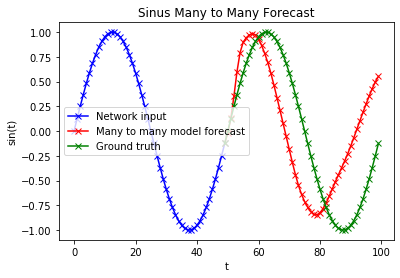

In [28]:





def train_sinus(model, dataX, dataY, epoch_count):
    """ 
        trains only the sinus model
    """
    history = model.fit(dataX, dataY, batch_size=1, nb_epoch=epoch_count, validation_split=0.05)

''' 
    testing how well the network can predict
    a simple sinus wave.
'''
t = np.arange(0.0, 4.0, 0.02)
sinus = np.sin(2 * np.pi * t)
sinus = sinus.reshape((sinus.shape[0], 1))
n_pre = 50
n_post = 50

dX, dY = [], []
for i in range(len(sinus)-n_pre-n_post):
    dX.append(sinus[i:i+n_pre])
    dY.append(sinus[i+n_pre:i+n_pre+n_post])
    #dY.append(sinus[i+n_pre])
dataX = np.array(dX)
dataY = np.array(dY)

# create and fit the LSTM network
print('creating model...')
model = create_model(n_pre, n_post, 1)
train_sinus(model, dataX, dataY, EPOCHS)

# now test
t = np.arange(15.0, 19.0, 0.02)
sinus = np.sin(2 * np.pi * t)
sinus = sinus.reshape((sinus.shape[0], 1))

dX, dY = [], []
for i in range(len(sinus)-n_pre-n_post):
    dX.append(sinus[i:i+n_pre])
    dY.append(sinus[i+n_pre:i+n_pre+n_post])
data_testX = np.array(dX)
data_testY = np.array(dY)

predict = model.predict(data_testX)

# now plot
nan_array = np.empty((n_pre - 1))
nan_array.fill(np.nan)
nan_array2 = np.empty(n_post)
nan_array2.fill(np.nan)
ind = np.arange(n_pre + n_post)

fig, ax = plt.subplots()
for i in range(0, 50, 50):

    forecasts = np.concatenate((nan_array, dataX[i, -1:, 0], predict[i, :, 0]))
    ground_truth = np.concatenate((nan_array, dataX[i, -1:, 0], dataY[i, :, 0]))
    network_input = np.concatenate((dataX[i, :, 0], nan_array2))

    ax.plot(ind, network_input, 'b-x', label='Network input')
    ax.plot(ind, forecasts, 'r-x', label='Many to many model forecast')
    ax.plot(ind, ground_truth, 'g-x', label = 'Ground truth')

    plt.xlabel('t')
    plt.ylabel('sin(t)')
    plt.title('Sinus Many to Many Forecast')
    plt.legend(loc='best')
    plt.show()
     #plt.savefig('test_sinus/plot_mtm_triple_' + str(i) + '.png')
     #plt.cla()



In [3]:
model = Sequential()  
model.add(LSTM(input_dim=1, output_dim=300, return_sequences=False))  
model.add(RepeatVector(10))
model.add(LSTM(output_dim=300, return_sequences=True))  
model.add(TimeDistributed(Dense(1)))
model.add(Activation('linear'))   
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])  

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])  

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
  
W1209 19:50:19.649670  8828 deprecation.py:506] From C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the 

In [32]:
dataX.shape

(100, 50, 1)

In [33]:
dataY.shape

(100, 50, 1)

In [16]:
model.fit(dataX, dataY, batch_size=1, nb_epoch=2, validation_split=0.05)


Train on 133 samples, validate on 7 samples
Epoch 1/2
  3/133 [..............................] - ETA: 7s - loss: 0.0407 - accuracy: 0.0000e+00

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


133/133 [==============================] - 7s 54ms/step - loss: 0.0302 - accuracy: 0.0000e+00 - val_loss: 8.7264e-04 - val_accuracy: 0.0000e+00
Epoch 2/2
133/133 [==============================] - 7s 54ms/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0000e+00


In [17]:
dataX[:3].shape

(3, 50, 1)

In [18]:
model.predict_on_batch(np.array(dataX[:3]))

array([[[0.03918368],
        [0.10234917],
        [0.17745636],
        [0.25615323],
        [0.33079156],
        [0.3959601 ],
        [0.44857174],
        [0.4876076 ],
        [0.51365584],
        [0.5284004 ]],

       [[0.14171076],
        [0.20024706],
        [0.2774561 ],
        [0.35255688],
        [0.42134476],
        [0.47956473],
        [0.5252563 ],
        [0.5581491 ],
        [0.5792683 ],
        [0.5904641 ]],

       [[0.24165303],
        [0.29440042],
        [0.37216246],
        [0.44217652],
        [0.503801  ],
        [0.55400455],
        [0.59197783],
        [0.6181878 ],
        [0.6340566 ],
        [0.6415494 ]]], dtype=float32)

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 300)               362400    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 10, 300)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 300)           721200    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 1)             301       
_________________________________________________________________
activation_3 (Activation)    (None, 10, 1)             0         
Total params: 1,083,901
Trainable params: 1,083,901
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array(([0.1, 0.2, 0.3])).reshape(1,3,1)
# make and show prediction
#print(model.predict(data))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])  


In [6]:
data.shape

(1, 3, 1)

In [7]:
data

array([[[0.1],
        [0.2],
        [0.3]]])

In [8]:
data.dtype

dtype('float64')

In [9]:
y=np.array([.3]).reshape((1,1))

In [10]:
model.fit(data,y)

W1209 19:50:34.886448  8828 module_wrapper.py:139] From C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/1
1/1 [==============================] - 0s 153ms/step - loss: 0.0443 - accuracy: 0.0000e+00


In [11]:
model.predict(np.array(data,dtype=np.float64))

array([[0.09164937]], dtype=float32)

In [35]:
mmatrix = np.zeros((2, 3))
mmatrix.shape

(2, 3)

In [1]:
import numpy as np
np.__version__

'1.17.4'

In [17]:
data[0]

array([[0.1],
       [0.2],
       [0.3]])

In [8]:
import keras
import tensorflow as tf

In [14]:
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3, 1)              0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
